In [4]:
%matplotlib inline
%load_ext blackcellmagic
%load_ext autoreload
%autoreload 2

The blackcellmagic extension is already loaded. To reload it, use:
  %reload_ext blackcellmagic
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import binom
import pandas as pd
import numpy as np

from minavrfpy import lib

## single epoch

In [6]:
epoch = 14
bp_key = "B62qrQiw9JhUumq457sMxicgQ94Z1WD9JChzJu19kBE8Szb5T8tcUAC"

results = lib.get_epoch_df(epoch, block_producer_key=bp_key)

df = results['df']
stakes_df = results['stakes_df']

## outcome per epoch

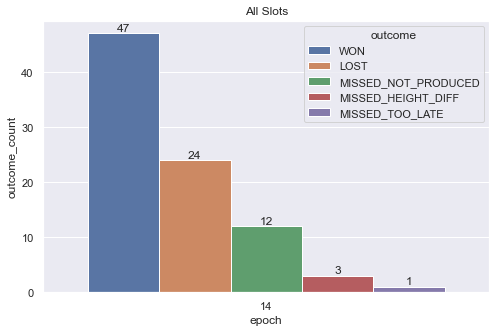

In [7]:
sns.set(rc={"figure.figsize": (8, 5)})


counts_df = (
    df.groupby("epoch")
    .outcome.value_counts()
    .to_frame()
    .rename(columns={"outcome": "outcome_count"})
    .reset_index()
)

ax = sns.barplot(x="epoch", y="outcome_count", data=counts_df, hue="outcome")
ax.set_title("All Slots")
for container in ax.containers:
    ax.bar_label(container)

## outcome grouped by super_charged

In [8]:
df.groupby(["epoch", "super_charged"]).outcome.value_counts()

epoch  super_charged  outcome            
14     False          WON                    33
                      LOST                   18
                      MISSED_NOT_PRODUCED     9
                      MISSED_HEIGHT_DIFF      3
       True           WON                    14
                      LOST                    6
                      MISSED_NOT_PRODUCED     3
                      MISSED_TOO_LATE         1
Name: outcome, dtype: int64

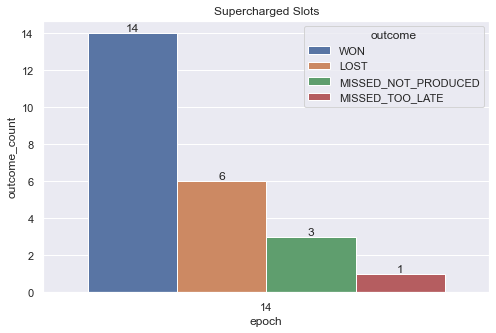

In [9]:
sns.set(rc={"figure.figsize": (8, 5)})


counts_df = (
    df[df.super_charged == True].groupby("epoch")
    .outcome.value_counts()
    .to_frame()
    .rename(columns={"outcome": "outcome_count"})
    .reset_index()
)

ax = sns.barplot(x="epoch", y="outcome_count", data=counts_df, hue="outcome")
ax.set_title("Supercharged Slots")
for container in ax.containers:
    ax.bar_label(container)

In [10]:
df[df.outcome == "MISSED_NOT_PRODUCED"]

,epoch,slot,global_slot,block,winner_exists,saw_my_producer,bp_won,block_time,received_time,winner_pk,super_charged,block_height_equal,too_late,min_bt,min_bt_minutes,outcome,next_block_in
0,14,88,100048,69811,True,False,False,[],2021-10-11 10:26:48.554000+00:00,B62qo8FPFHTQ2J5eaCK74yfsMRBFT5bnr2iPomWLv61iGp...,False,False,True,0 days,0.0,MISSED_NOT_PRODUCED,NaN
1,14,162,100122,69852,True,False,False,[],2021-10-11 14:08:03.649000+00:00,B62qkBoe9qNqxTiXBe5euvRvZi8rCUq9TgHfM2BwmcED7A...,False,False,True,0 days,0.0,MISSED_NOT_PRODUCED,NaN
2,14,206,100166,69871,True,False,False,[],2021-10-11 16:20:40.128000+00:00,B62qopfSgwEn28YdwZHh4khMy3KEG9dy8Jfrv7cveUJw2s...,False,False,True,0 days,0.0,MISSED_NOT_PRODUCED,NaN
4,14,404,100364,69987,True,False,False,[],2021-10-12 02:15:21.287000+00:00,B62qo8FPFHTQ2J5eaCK74yfsMRBFT5bnr2iPomWLv61iGp...,False,False,True,0 days,0.0,MISSED_NOT_PRODUCED,NaN
11,14,1396,101356,70612,True,False,False,[],2021-10-14 03:54:14.775000+00:00,B62qiap2uo2Kt8RzoupS8jqCvAKiUZZmiXZUJM9gpmc1zq...,False,False,True,0 days,0.0,MISSED_NOT_PRODUCED,NaN
13,14,1712,101672,70818,True,False,False,[],2021-10-14 19:38:07.548000+00:00,B62qopfSgwEn28YdwZHh4khMy3KEG9dy8Jfrv7cveUJw2s...,False,False,True,0 days,0.0,MISSED_NOT_PRODUCED,NaN
21,14,2331,102291,71228,True,False,False,[],2021-10-16 02:35:52.863000+00:00,B62qo4ptt2LrTSGFagi9YGqQTumdQWiXe9Jfxs9eVckk9X...,True,False,True,0 days,0.0,MISSED_NOT_PRODUCED,NaN
26,14,2697,102657,71467,True,False,False,[],2021-10-16 20:53:20.180000+00:00,B62qrc1oV3hwHn8B6ShcUtSXo4kfr7ES4N14V7bzUTe5dA...,True,False,True,0 days,0.0,MISSED_NOT_PRODUCED,NaN
54,14,4700,104660,False,False,False,False,[],NaT,B62qiap2uo2Kt8RzoupS8jqCvAKiUZZmiXZUJM9gpmc1zq...,False,False,True,0 days,0.0,MISSED_NOT_PRODUCED,NaN
65,14,5297,105257,73198,True,False,False,[],2021-10-22 06:54:24.559000+00:00,B62qopfSgwEn28YdwZHh4khMy3KEG9dy8Jfrv7cveUJw2s...,False,False,True,0 days,0.0,MISSED_NOT_PRODUCED,NaN


In [11]:
df[df.outcome == "MISSED_HEIGHT_DIFF"]

,epoch,slot,global_slot,block,winner_exists,saw_my_producer,bp_won,block_time,received_time,winner_pk,super_charged,block_height_equal,too_late,min_bt,min_bt_minutes,outcome,next_block_in
6,14,776,100736,70205,True,True,False,[0 days 00:01:37.085000],2021-10-12 20:50:57.504000+00:00,B62qiap2uo2Kt8RzoupS8jqCvAKiUZZmiXZUJM9gpmc1zq...,False,False,False,0 days 00:01:37.085000,1.616667,MISSED_HEIGHT_DIFF,NaN
38,14,3407,103367,71936,True,True,False,[0 days 02:53:13.904000],2021-10-18 08:24:03.980000+00:00,B62qiap2uo2Kt8RzoupS8jqCvAKiUZZmiXZUJM9gpmc1zq...,False,False,True,0 days 02:53:13.904000,173.216667,MISSED_HEIGHT_DIFF,NaN
39,14,3464,103424,71977,True,True,False,[0 days 00:02:15.646000],2021-10-18 11:14:34.750000+00:00,B62qo8FPFHTQ2J5eaCK74yfsMRBFT5bnr2iPomWLv61iGp...,False,False,False,0 days 00:02:15.646000,2.250000,MISSED_HEIGHT_DIFF,NaN


In [12]:
df[df.outcome == "MISSED_TOO_LATE"]

,epoch,slot,global_slot,block,winner_exists,saw_my_producer,bp_won,block_time,received_time,winner_pk,super_charged,block_height_equal,too_late,min_bt,min_bt_minutes,outcome,next_block_in
56,14,4728,104688,False,False,True,False,[0 days 00:03:35.244000],NaT,B62qkU9odZBJZVDkkQTcZiVm5N86Dq3vqJBJxHziNgzVMJ...,True,False,True,0 days 00:03:35.244000,3.583333,MISSED_TOO_LATE,NaN


## slot luck
try to visualize "slot luck"


epoch 14 - expected 73 slots - got 87... 


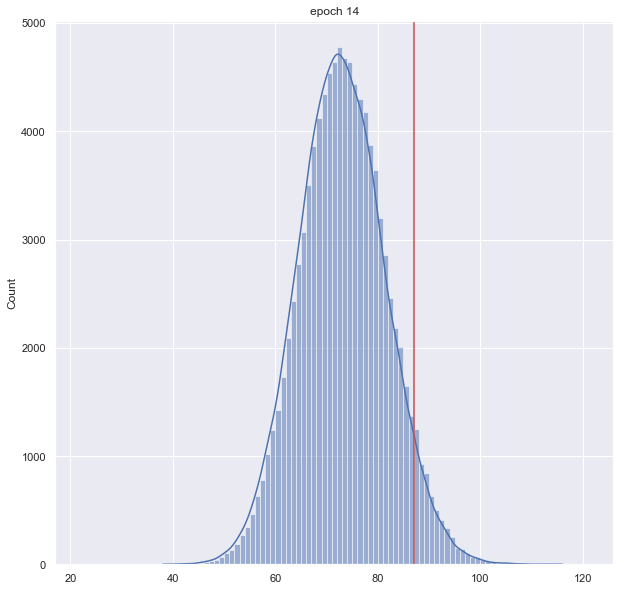

<Figure size 576x360 with 0 Axes>

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

SLOTS_PER_EPOCH = 7140

def get_slot_win_perc(stake, total_currency):
    return (1 - ((1 / 4) ** (stake / total_currency)))


epoch_data = []

total_currency = results['epoch_data']['total_currency']
total_staking_balance = results['stakes_df'].balance.sum()

slot_win_pct = get_slot_win_perc(
    total_staking_balance, total_currency
)    
expected_blocks_value = slot_win_pct * SLOTS_PER_EPOCH 

won_blocks = df[(df.epoch == epoch) & (df.outcome == 'WON')].block.count()
slots_won = df[(df.epoch == epoch)].slot.nunique()

data = binom.rvs(n=SLOTS_PER_EPOCH, p=slot_win_pct, size=100000)

k = np.arange(int(expected_blocks_value - 50), int(expected_blocks_value) + 50, 1)

plt.figure(epoch)

sns.histplot(data, kde=True, bins=k, ax=ax)
ax.axvline(slots_won, 0, 1, color="r")
ax.set_title(f"epoch {epoch}")

epoch_data.append({
    'epoch': epoch,
    'expected_slots': expected_blocks_value,
    'expected_slots_binom': binom(SLOTS_PER_EPOCH, slot_win_pct).expect(),
    'slot_win_pct': slot_win_pct,
    'won_slots': slots_won,
    'won_blocks': won_blocks,
    'orphan_rate': 1 - (won_blocks/slots_won)
})

print(f"epoch {epoch} - expected {round(expected_blocks_value)} slots - got {slots_won}... ")


plt.show()

In [14]:
epoch_slots_df = pd.DataFrame(epoch_data)

epoch_slots_df["cdf"] = epoch_slots_df.apply(
    lambda row: binom.cdf(row["won_slots"], SLOTS_PER_EPOCH, row["slot_win_pct"]),
    axis=1,
)
epoch_slots_df

,epoch,expected_slots,expected_slots_binom,slot_win_pct,won_slots,won_blocks,orphan_rate,cdf
0,14,72.918575,72.918575,0.010213,87,47,0.45977,0.953779
